<a href="https://colab.research.google.com/github/Bhuvanjeet/COVID-19-Dataset-Analysis/blob/master/covid19_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 Dataset Analysis**

**Context**

Coronaviruses are a large family of viruses which may cause illness in animals or humans. In humans, several coronaviruses are known to cause respiratory infections ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS) and Severe Acute Respiratory Syndrome (SARS). The most recently discovered coronavirus causes coronavirus disease COVID-19 - World Health Organization

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.

State level data comes from Ministry of Health & Family Welfare

Individual level data comes from covid19india

**Content**

COVID-19 cases at daily level is present in covid_19_india.csv file

Individual level details are present in IndividualDetails.csv file

Population at state level is present in population_india_census2011.csv file

Number of COVID-19 tests at daily level in ICMRTestingDetails.csv file

Number of hospital beds in each state in present in HospitalBedsIndia.csv file

**Source**

2 datasets have been visualized:

1- https://www.kaggle.com/sudalairajkumar/covid19-in-india



2- https://www.kaggle.com/soham1024/covid-19-india-zone-classification

**This project is divided into two parts.**

**This notebook is Part I and consists of Exploratory Data Analysis of the dataset**

**Exploratory Data Analysis - EDA**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px
import IPython
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
import io

In [0]:
# to display plotly plots in colab
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [4]:
uploaded=files.upload()

Saving AgeGroupDetails.csv to AgeGroupDetails (1).csv
Saving covid_19_india.csv to covid_19_india (1).csv
Saving HospitalBedsIndia.csv to HospitalBedsIndia (1).csv
Saving ICMRTestingDetails.csv to ICMRTestingDetails (1).csv
Saving ICMRTestingLabs.csv to ICMRTestingLabs (1).csv
Saving IndividualDetails.csv to IndividualDetails (1).csv
Saving population_india_census2011.csv to population_india_census2011 (1).csv
Saving StatewiseTestingDetails.csv to StatewiseTestingDetails (1).csv


In [91]:
uploaded=files.upload()

Saving lockdownindiawarningzones.csv to lockdownindiawarningzones.csv


In [0]:
# reading the dataset 1
df_individual=pd.read_csv(io.StringIO(uploaded['IndividualDetails.csv'].decode('utf-8')))
df_age=pd.read_csv(io.StringIO(uploaded['AgeGroupDetails.csv'].decode('utf-8')))
df_hospbeds=pd.read_csv(io.StringIO(uploaded['HospitalBedsIndia.csv'].decode('utf-8')))
df_icmrlabs=pd.read_csv(io.StringIO(uploaded['ICMRTestingLabs.csv'].decode('utf-8')))
df_icmrdet=pd.read_csv(io.StringIO(uploaded['ICMRTestingDetails.csv'].decode('utf-8')))
df_covidindia=pd.read_csv(io.StringIO(uploaded['covid_19_india.csv'].decode('utf-8')))
df_population=pd.read_csv(io.StringIO(uploaded['population_india_census2011.csv'].decode('utf-8')))
df_statewise=pd.read_csv(io.StringIO(uploaded['StatewiseTestingDetails.csv'].decode('utf-8')))

In [0]:
# reading the dataset 2
df_lockdownwar=pd.read_csv(io.StringIO(uploaded['lockdownindiawarningzones.csv'].decode('utf-8')))

**COVID-19 confirmed Cases By Indian Neighbour Countries**

In [1]:
from IPython.core.display import HTML
HTML('''<div class="flourish-embed" data-src="story/258632" data-url="https://flo.uri.sh/story/258632/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

**Visualizing Dataset 1:**

**IndividualDetails.csv**

In [42]:
df_individual.head()

id  ...                                              notes
0   0  ...                               Travelled from Wuhan
1   1  ...                               Travelled from Wuhan
2   2  ...                               Travelled from Wuhan
3   3  ...                      Travelled from Austria, Italy
4   4  ...  Travelled from Dubai to Bangalore on 20th Feb,...

[5 rows x 12 columns]

In [43]:
df_individual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27890 entries, 0 to 27889
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  27890 non-null  int64 
 1   government_id       2997 non-null   object
 2   diagnosed_date      27890 non-null  object
 3   age                 2346 non-null   object
 4   gender              5313 non-null   object
 5   detected_city       2347 non-null   object
 6   detected_district   20240 non-null  object
 7   detected_state      27890 non-null  object
 8   nationality         2707 non-null   object
 9   current_status      27890 non-null  object
 10  status_change_date  27780 non-null  object
 11  notes               26555 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.6+ MB


In [44]:
sum(df_individual.duplicated())
#since id is unique for each row and is numbering only starting from 0 onwards

0

In [0]:
df_individual.drop('id',axis=1,inplace=True)

In [7]:
sum(df_individual.duplicated())

21618

In [0]:
df_individual.drop_duplicates(inplace=True)

In [48]:
sum(df_individual.duplicated())

0

In [49]:
df_individual.isnull().sum()

government_id         3275
diagnosed_date           0
age                   3961
gender                3105
detected_city         4796
detected_district      108
detected_state           0
nationality           4957
current_status           0
status_change_date      17
notes                  247
dtype: int64

In [9]:
gender_count=df_individual['gender'].value_counts()
print(gender_count)

summ=gender_count.sum()  
print('No.of counts:',summ)

M    2159
F    1008
Name: gender, dtype: int64
No.of counts: 3167


In [10]:
per=[]
for i in gender_count:
    perc=i/summ
    print(perc)
    per.append(format(perc,'.2f'))

0.68171771392485
0.31828228607514997


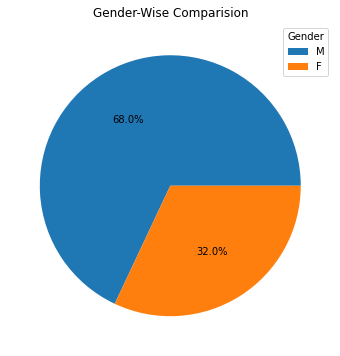

In [11]:
plt.figure(figsize=(10,6))    
plt.title('Gender-Wise Comparision')
plt.pie(per,autopct='%.1f%%')
plt.legend(gender_count.index,title='Gender')

**AgeGroupDetails.csv**

Age-Wise Data Analysis.

In [55]:
df_age.head()

Sno AgeGroup  TotalCases Percentage
0    1      0-9          22      3.18%
1    2    10-19          27      3.90%
2    3    20-29         172     24.86%
3    4    30-39         146     21.10%
4    5    40-49         112     16.18%

In [56]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [0]:
df_age.drop('Sno',axis=1,inplace=True)

In [13]:
sum(df_age.duplicated())

0

In [14]:
df_age.isnull().sum()

AgeGroup      0
TotalCases    0
Percentage    0
dtype: int64

In [0]:
import re

We cannot convert datatype of df_age['Percentage'] due to the presence of '%' sign in every value. So we have to use re to get the numeric values of percentages.

In [16]:
perc=[]
for i in df_age['Percentage']:
    per=float(re.findall("\d+\.\d+",i)[0])
    print(per)
    perc.append(per)

3.18
3.9
24.86
21.1
16.18
11.13
12.86
4.05
1.45
1.3


In [17]:
configure_plotly_browser_state()   # this is required to display plotly plots in colab
px.pie(df_age,values=perc,names="AgeGroup",title="Age-Group Case Distribution")

**HospitalBedsIndia.csv**

Hospital beds state-wise comparison.

In [64]:
df_hospbeds.head()

Sno                   State/UT  ... NumUrbanHospitals_NHP18  NumUrbanBeds_NHP18
0    1  Andaman & Nicobar Islands  ...                       3                 500
1    2             Andhra Pradesh  ...                      65               16658
2    3          Arunachal Pradesh  ...                      10                 268
3    4                      Assam  ...                      50                6198
4    5                      Bihar  ...                     103                5936

[5 rows x 12 columns]

In [65]:
df_hospbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     int64  
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      30 non-null     float64
 5   NumDistrictHospitals_HMIS         37 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int64  
 7   NumPublicBeds_HMIS                37 non-null     int64  
 8   NumRuralHospitals_NHP18           37 non-null     int64  
 9   NumRuralBeds_NHP18                37 non-null     int64  
 10  NumUrbanHospitals_NHP18           37 non-null     int64  
 11  NumUrbanBeds_NHP18                37 non-null     int64  
dtypes: float64

In [0]:
df_hospbeds.drop('Sno',axis=1,inplace=True)

In [67]:
sum(df_hospbeds.duplicated())

0

In [68]:
df_hospbeds.isnull().sum()

State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        7
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [0]:
# calculating totla no. of beds
df_hospbeds['Total Beds']=df_hospbeds['NumPublicBeds_HMIS'] + df_hospbeds['NumRuralBeds_NHP18']+df_hospbeds['NumUrbanBeds_NHP18']

In [71]:
df_hospbeds.head()

State/UT  ... Total Beds
0  Andaman & Nicobar Islands  ...       2321
1             Andhra Pradesh  ...      83937
2          Arunachal Pradesh  ...       4724
3                      Assam  ...      36257
4                      Bihar  ...      29815

[5 rows x 12 columns]

In [20]:
configure_plotly_browser_state()
px.pie(df_hospbeds,values='Total Beds',names="State/UT",title="State-Wise Number of Beds Available")

**ICMRTestingLabs.csv**

In [83]:
df_icmrlabs.head()

lab  ...                   type
0  ICMR-Regional Medical Research Centre, Port Blair  ...  Government Laboratory
1  Tomo Riba Institute of Health & Medical Scienc...  ...        Collection Site
2  Sri Venkateswara Institute of Medical Sciences...  ...  Government Laboratory
3                Rangaraya Medical College, Kakinada  ...  Government Laboratory
4               Sidhartha Medical College, Vijaywada  ...  Government Laboratory

[5 rows x 6 columns]

In [84]:
df_icmrlabs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lab      267 non-null    object
 1   address  267 non-null    object
 2   pincode  267 non-null    int64 
 3   city     267 non-null    object
 4   state    267 non-null    object
 5   type     267 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.6+ KB


In [85]:
sum(df_icmrlabs.duplicated())

0

In [86]:
df_icmrlabs.isnull().sum()

lab        0
address    0
pincode    0
city       0
state      0
type       0
dtype: int64

In [87]:
configure_plotly_browser_state()  # this is required to display plotly plots in colab
fig = px.treemap(df_icmrlabs, path=['state','city'],color='city',color_continuous_scale='reds',hover_data=['lab','address'],)
fig.show()

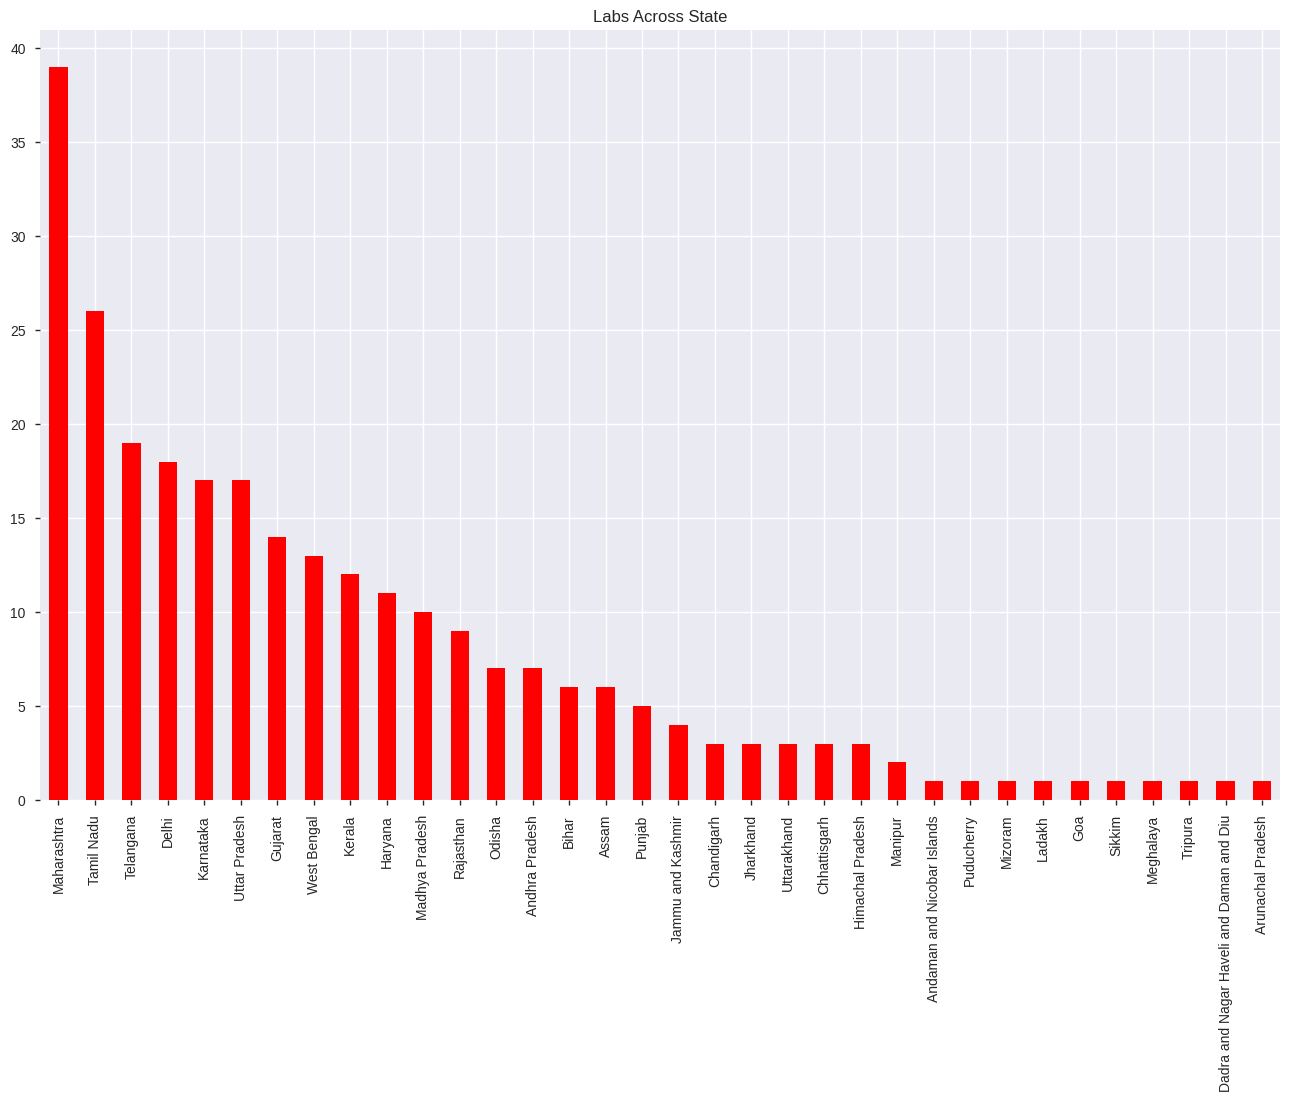

In [80]:
plt.figure(figsize=(16, 10))
plt.title('Labs Across State')
df_icmrlabs.state.value_counts().plot.bar(color='r');

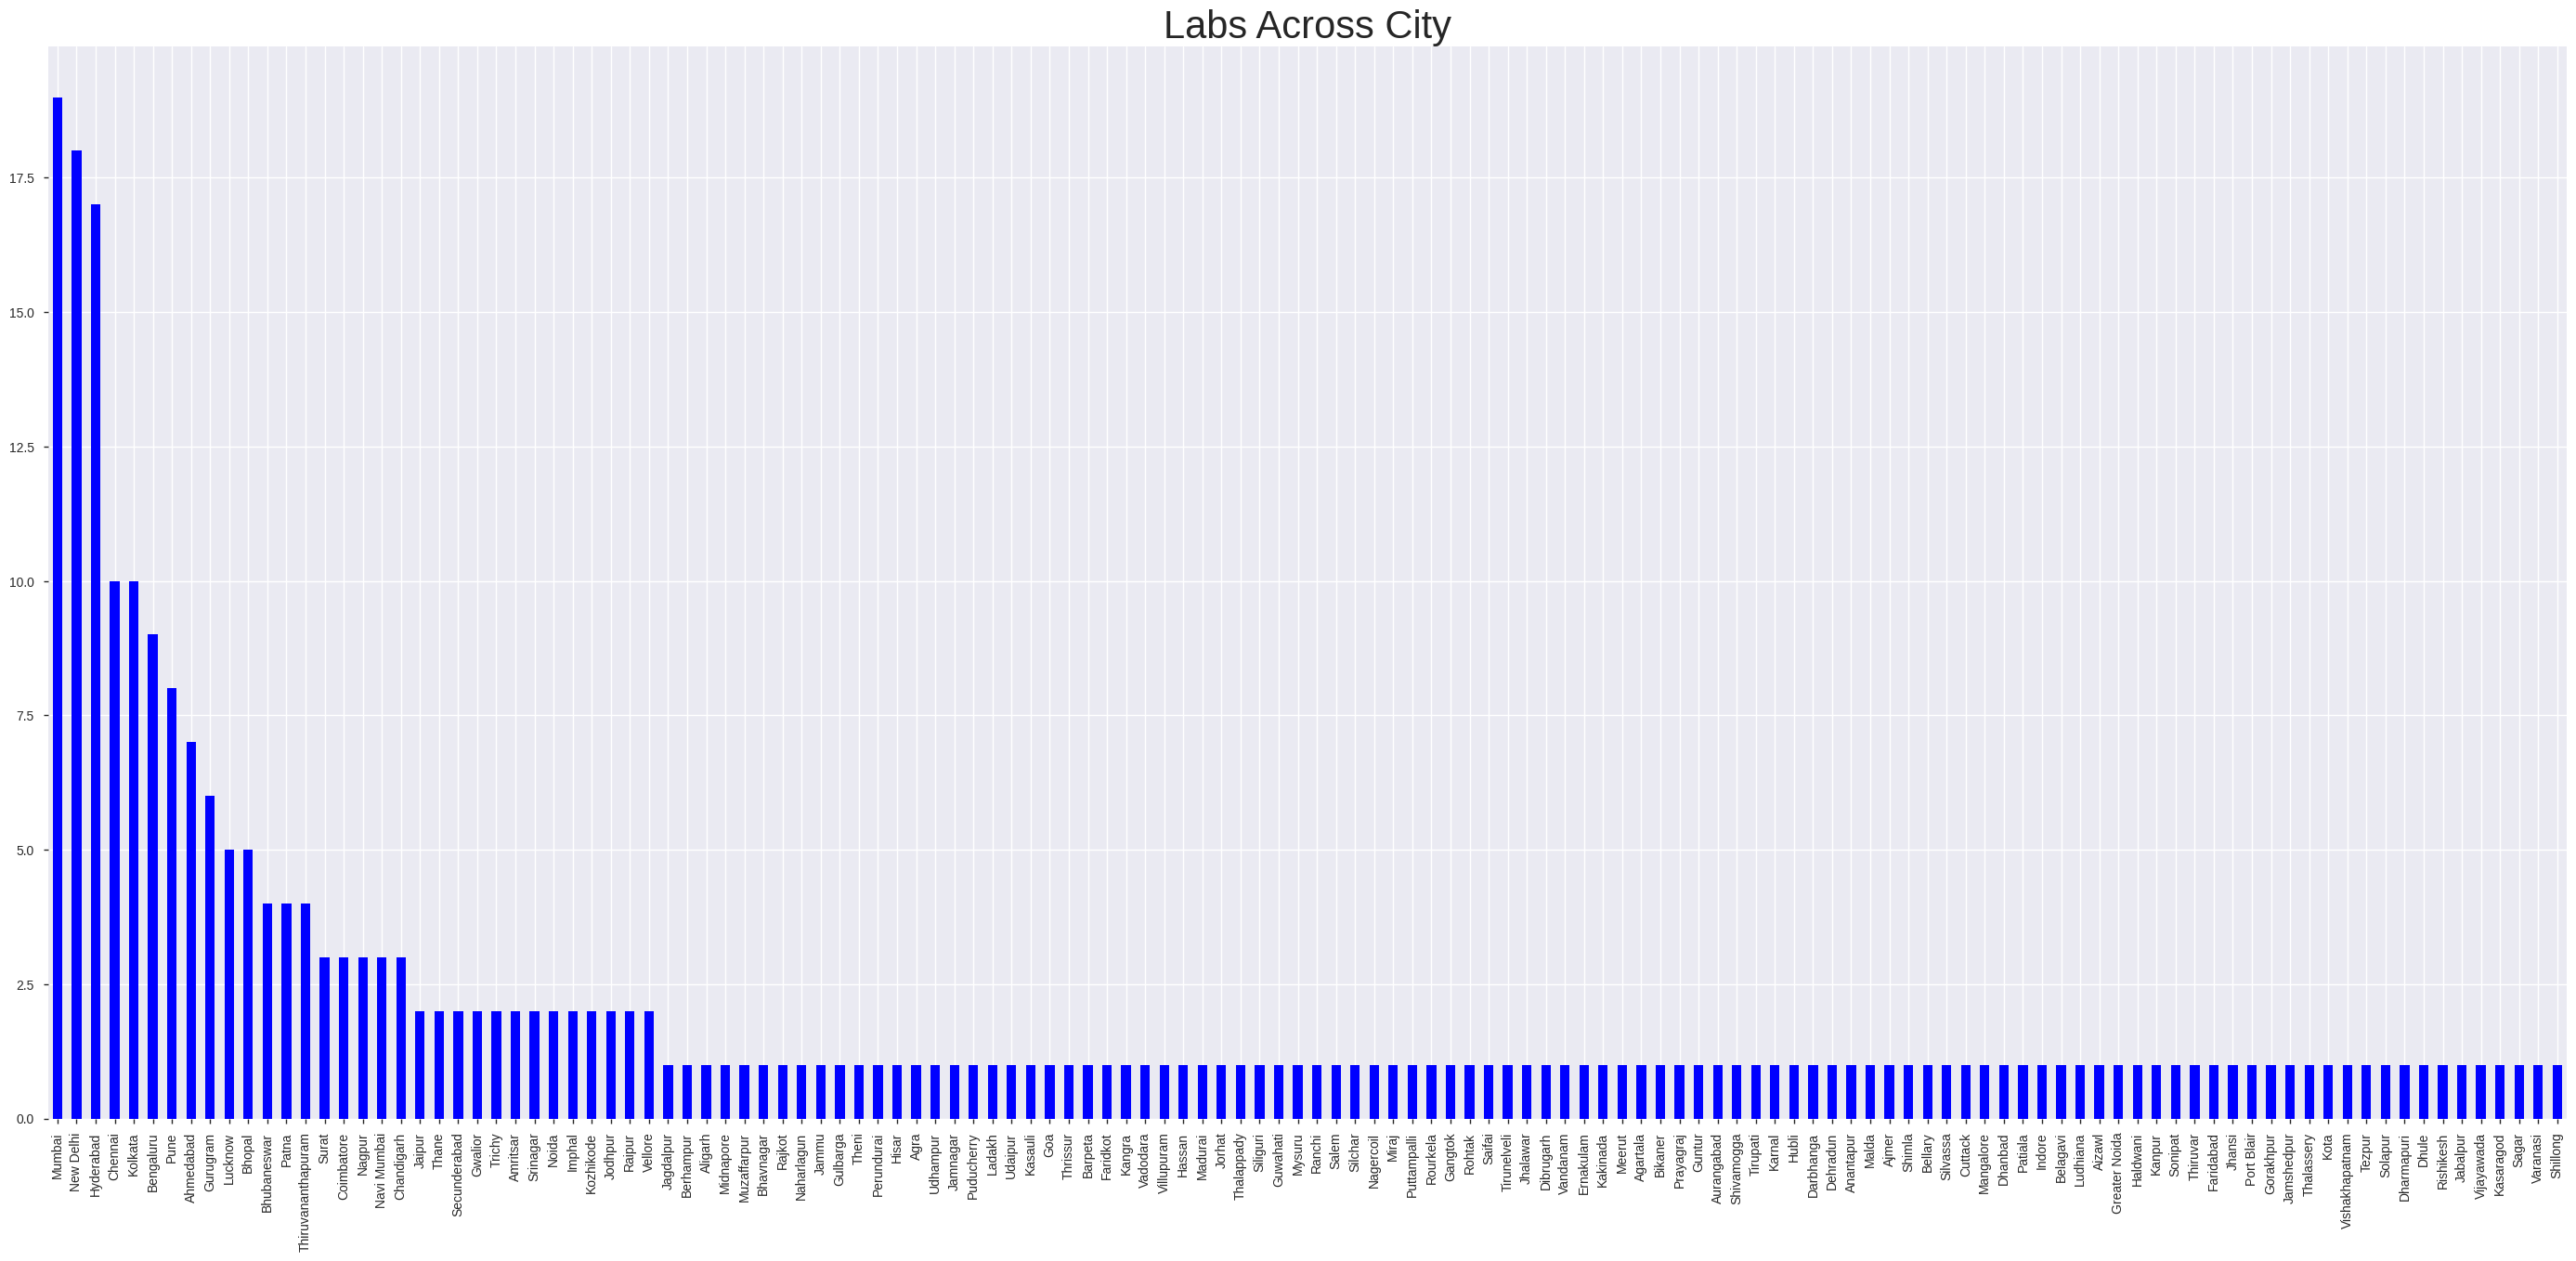

In [81]:
plt.figure(figsize=(35, 15))
plt.title('Labs Across City',size='30')
df_icmrlabs['city'].value_counts().plot.bar(color='b');

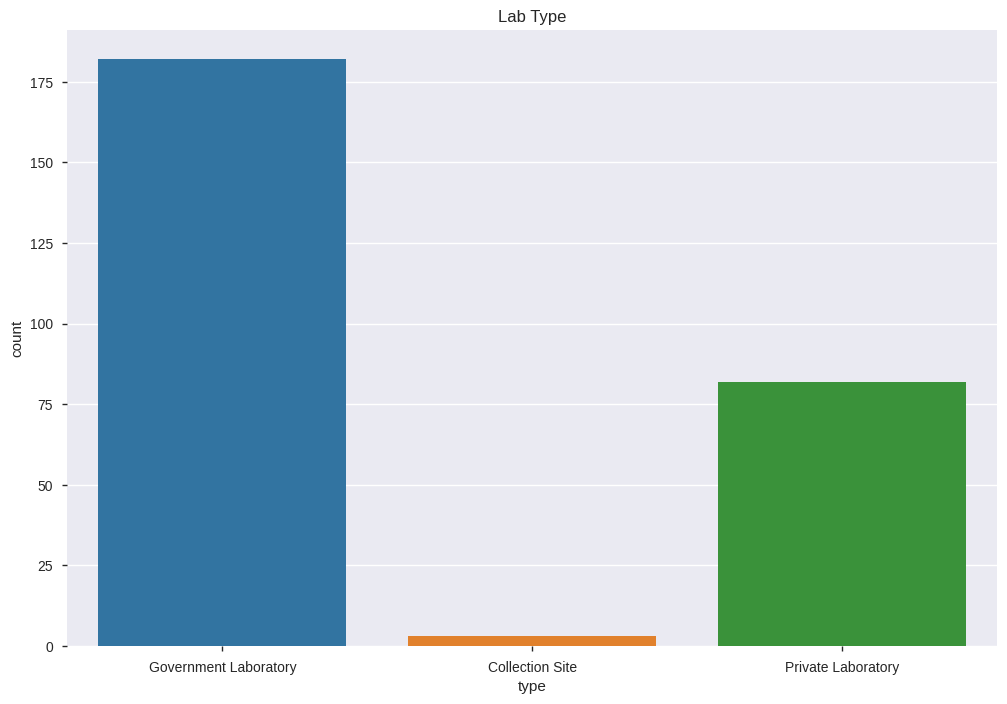

In [82]:
plt.figure(figsize=(12, 8))
plt.title('Lab Type')
sns.countplot(df_icmrlabs['type'])

**ICMRTestingDetails.csv**

In [0]:
df_icmrdet.head()

SNo        DateTime  TotalSamplesTested  TotalIndividualsTested  \
0    1  13/03/20 18:00              6500.0                  5900.0   
1    2  18/03/20 18:00             13125.0                 12235.0   
2    3  19/03/20 18:00             14175.0                 13285.0   
3    4  20/03/20 18:00             15404.0                 14514.0   
4    5  21/03/20 18:00             16911.0                 16021.0   

   TotalPositiveCases  
0                78.0  
1               150.0  
2               182.0  
3               236.0  
4               315.0

In [0]:
df_icmrdet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SNo                     42 non-null     int64  
 1   DateTime                42 non-null     object 
 2   TotalSamplesTested      38 non-null     float64
 3   TotalIndividualsTested  23 non-null     float64
 4   TotalPositiveCases      31 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.8+ KB


In [0]:
df_icmrdet.isnull().sum()

SNo                        0
DateTime                   0
TotalSamplesTested         4
TotalIndividualsTested    19
TotalPositiveCases        11
dtype: int64

In [0]:
df_icmrdet.drop('SNo',axis=1,inplace=True)

In [0]:
sum(df_icmrdet.duplicated())

0

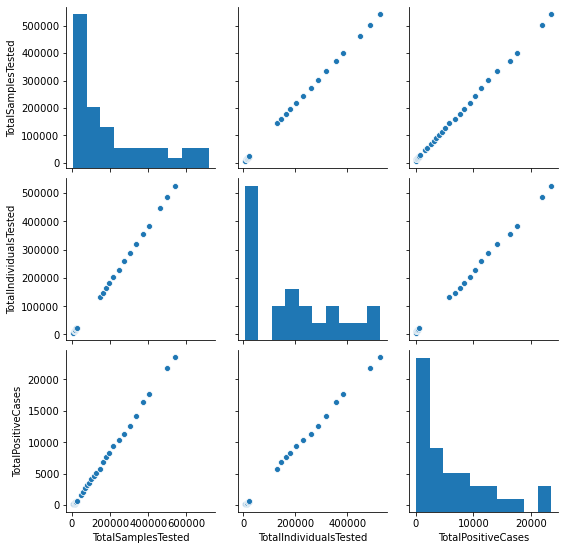

In [0]:
sns.pairplot(df_icmrdet)

In [0]:
df_icmrdet['DateTime']=pd.to_datetime(df_icmrdet['DateTime'],infer_datetime_format=True)

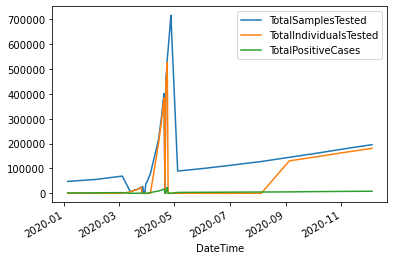

In [0]:
df_icmrdet.groupby(by='DateTime').sum().plot(kind='line')

<BarContainer object of 42 artists>

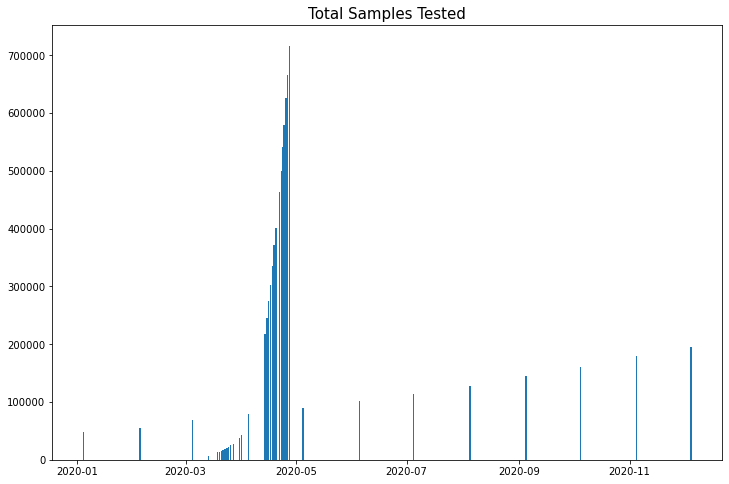

In [0]:
plt.figure(figsize=(12,8))
plt.title('Total Samples Tested',size='15')
plt.bar(df_icmrdet.DateTime, df_icmrdet.TotalSamplesTested)

<BarContainer object of 42 artists>

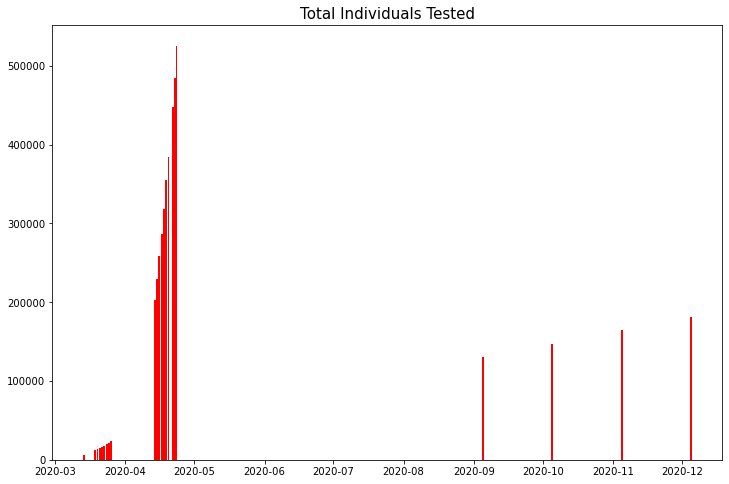

In [0]:
plt.figure(figsize=(12,8))
plt.title('Total Individuals Tested',size='15')
plt.bar(df_icmrdet.DateTime, df_icmrdet.TotalIndividualsTested,color='r')

<BarContainer object of 42 artists>

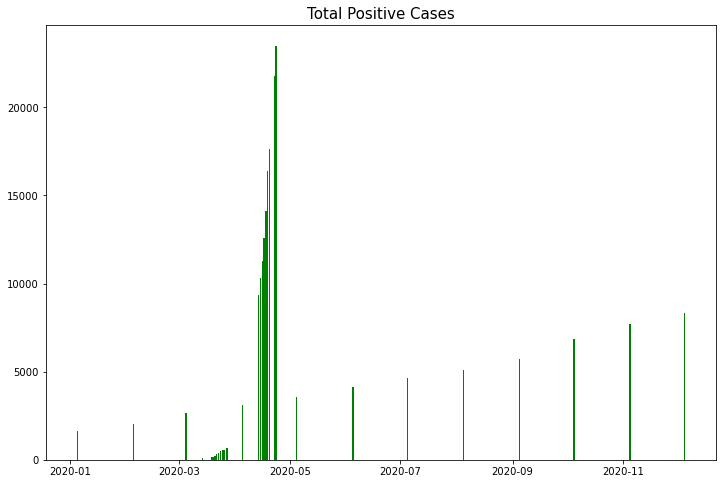

In [0]:
plt.figure(figsize=(12,8))
plt.title('Total Positive Cases',size='15')
plt.bar(df_icmrdet.DateTime, df_icmrdet.TotalPositiveCases,color='g')

In [0]:
 #state reports

**covid_19_india.csv**

COVID cases w.r.t State/UnionTerritory analysis

In [0]:
df_covidindia.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [0]:
df_covidindia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       1935 non-null   int64 
 1   Date                      1935 non-null   object
 2   Time                      1935 non-null   object
 3   State/UnionTerritory      1935 non-null   object
 4   ConfirmedIndianNational   1935 non-null   object
 5   ConfirmedForeignNational  1935 non-null   object
 6   Cured                     1935 non-null   int64 
 7   Deaths                    1935 non-null   int64 
 8   Confirmed                 1935 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 136.2+ KB


In [0]:
df_covidindia.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [0]:
df_covidindia.drop('Sno',axis=1,inplace=True)

In [0]:
df_covidindia.drop('ConfirmedIndianNational',axis=1,inplace=True)

In [0]:
df_covidindia.drop('ConfirmedForeignNational',axis=1,inplace=True)

In [0]:
# calculating 'Active' cases
df_covidindia['Active']=df_covidindia['Confirmed']-df_covidindia['Cured']-df_covidindia['Deaths']

In [29]:
df_covidindia.head()

Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  Active
0  30/01/20  6:00 PM               Kerala      0       0          1       1
1  31/01/20  6:00 PM               Kerala      0       0          1       1
2  01/02/20  6:00 PM               Kerala      0       0          2       2
3  02/02/20  6:00 PM               Kerala      0       0          3       3
4  03/02/20  6:00 PM               Kerala      0       0          3       3

In [30]:
df_covidindia.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='YlOrBr',subset=["Confirmed"]).background_gradient(cmap='Reds',subset=["Deaths"]).background_gradient(cmap='Greens',subset=["Cured"]).background_gradient(cmap='Blues',subset=["Active"])   

In [0]:
df1=df_covidindia.copy(deep=True)

In [0]:
df1.head()

Date     Time State/UnionTerritory  Cured  Deaths  Confirmed  Active
0  30/01/20  6:00 PM               Kerala      0       0          1       1
1  31/01/20  6:00 PM               Kerala      0       0          1       1
2  01/02/20  6:00 PM               Kerala      0       0          2       2
3  02/02/20  6:00 PM               Kerala      0       0          3       3
4  03/02/20  6:00 PM               Kerala      0       0          3       3

In [0]:
df1.drop('Date',axis=1,inplace=True)

In [0]:
df1.drop('Time',axis=1,inplace=True)

In [0]:
df1=pd.pivot_table(df1,index=['State/UnionTerritory'],aggfunc=np.sum)

In [0]:
df1=df1.reset_index()

In [36]:
df1.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='YlOrBr',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])

In [45]:
import IPython
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1977187" data-url="https://flo.uri.sh/visualisation/1977187/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

In [47]:
configure_plotly_browser_state()
px.pie(df1,values='Active',names="State/UnionTerritory",title="State-Wise Distribution of Active cases")

**population_india_census2011.csv**

Population Analysis

In [0]:
df_population.head()

Sno State / Union Territory  Population  Rural population  \
0    1           Uttar Pradesh   199812341         155317278   
1    2             Maharashtra   112374333          61556074   
2    3                   Bihar   104099452          92341436   
3    4             West Bengal    91276115          62183113   
4    5          Madhya Pradesh    72626809          52557404   

   Urban population                         Area                  Density  \
0          44495063   240,928 km2 (93,023 sq mi)    828/km2 (2,140/sq mi)   
1          50818259  307,713 km2 (118,809 sq mi)      365/km2 (950/sq mi)   
2          11758016    94,163 km2 (36,357 sq mi)  1,102/km2 (2,850/sq mi)   
3          29093002    88,752 km2 (34,267 sq mi)  1,029/km2 (2,670/sq mi)   
4          20069405  308,245 km2 (119,014 sq mi)      236/km2 (610/sq mi)   

   Gender Ratio  
0           912  
1           929  
2           918  
3           953  
4           931

In [0]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sno                      36 non-null     int64 
 1   State / Union Territory  36 non-null     object
 2   Population               36 non-null     int64 
 3   Rural population         36 non-null     int64 
 4   Urban population         36 non-null     int64 
 5   Area                     36 non-null     object
 6   Density                  36 non-null     object
 7   Gender Ratio             36 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 2.4+ KB


In [0]:
df_population.isnull().sum()

Sno                        0
State / Union Territory    0
Population                 0
Rural population           0
Urban population           0
Area                       0
Density                    0
Gender Ratio               0
dtype: int64

In [0]:
df_population.drop('Sno',axis=1,inplace=True)

In [0]:
sum(df_population.duplicated())

0

In [49]:
configure_plotly_browser_state()
fig = px.treemap(df_population, path=['State / Union Territory','Density'],color='State / Union Territory',color_continuous_scale='reds',hover_data=['Population','Rural population','Urban population','Area','Density','Gender Ratio'])
fig.show()

**StatewiseTestingDetails.csv**

In [0]:
df_statewise.head()

Date                        State  TotalSamples  Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0    1210.0      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0       NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0       NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0       NaN      33.0
4  2020-04-02               Andhra Pradesh        1800.0    1175.0     132.0

In [0]:
df_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1022 non-null   object 
 1   State         1022 non-null   object 
 2   TotalSamples  1022 non-null   float64
 3   Negative      824 non-null    float64
 4   Positive      1014 non-null   float64
dtypes: float64(3), object(2)
memory usage: 40.0+ KB


In [50]:
sum(df_statewise.duplicated())

2

In [0]:
df_statewise=df_statewise.drop_duplicates()

In [52]:
sum(df_statewise.duplicated())

0

In [0]:
df_statewise.isnull().sum()

Date              0
State             0
TotalSamples      0
Negative        198
Positive          8
dtype: int64

In [0]:
df_statewise.drop('Date',axis=1,inplace=True)

In [0]:
df_state=pd.pivot_table(df_statewise,index=['State'],aggfunc=np.sum)

In [0]:
df_state.head()

Negative  Positive  TotalSamples
State                                                         
Andaman and Nicobar Islands     1210.0     105.0       10684.0
Andhra Pradesh               2703310.0   40044.0     2763870.0
Arunachal Pradesh              19565.0      44.0       23419.0
Assam                         183404.0     923.0      198001.0
Bihar                           2299.0   11241.0      672127.0

In [0]:
df_state=df_state.astype('int64')

In [0]:
df_state=df_state.reset_index()

In [57]:
df_state.sort_values('TotalSamples', ascending= False).style.background_gradient(cmap='Greens',subset=["Negative"])\
                        .background_gradient(cmap='Reds',subset=["Positive"])\
                        .background_gradient(cmap='YlOrBr',subset=["TotalSamples"])

**Merging all the related datasets to analyze more correlations in dataset:**

In [0]:
df_population=df_population.rename(columns={'State / Union Territory':'State/UnionTerritory'})

In [0]:
df_state=df_state.rename(columns={'State':'State/UnionTerritory'})

In [0]:
df_merge=pd.merge(df_population,df1,on='State/UnionTerritory')  # df1 was equal df_covidindia.copy(deep=True)

In [0]:
df_merge=pd.merge(df_merge,df_state,on='State/UnionTerritory')

In [0]:
df_individual=df_population.rename(columns={'detected_state':'State/UnionTerritory'})

In [0]:
df_merge=pd.merge(df_merge,df_individual,on='State/UnionTerritory')

In [0]:
df_hospbeds=df_hospbeds.rename(columns={'State/UT':'State/UnionTerritory'})

In [0]:
df_merge=pd.merge(df_merge,df_hospbeds,on='State/UnionTerritory')

In [0]:
df_icmrlabs=df_icmrlabs.rename(columns={'state':'State/UnionTerritory'})

In [0]:
df_merge=pd.merge(df_merge,df_icmrlabs,on='State/UnionTerritory')

In [68]:
#merged dataset columns
df_merge.columns

Index(['State/UnionTerritory', 'Population_x', 'Rural population_x',
       'Urban population_x', 'Area_x', 'Density_x', 'Gender Ratio_x', 'Active',
       'Confirmed', 'Cured', 'Deaths', 'Negative', 'Positive', 'TotalSamples',
       'Population_y', 'Rural population_y', 'Urban population_y', 'Area_y',
       'Density_y', 'Gender Ratio_y', 'NumPrimaryHealthCenters_HMIS',
       'NumCommunityHealthCenters_HMIS', 'NumSubDistrictHospitals_HMIS',
       'NumDistrictHospitals_HMIS', 'TotalPublicHealthFacilities_HMIS',
       'NumPublicBeds_HMIS', 'NumRuralHospitals_NHP18', 'NumRuralBeds_NHP18',
       'NumUrbanHospitals_NHP18', 'NumUrbanBeds_NHP18', 'Total Beds', 'lab',
       'address', 'pincode', 'city', 'type'],
      dtype='object')

In [69]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 0 to 239
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State/UnionTerritory              240 non-null    object 
 1   Population_x                      240 non-null    int64  
 2   Rural population_x                240 non-null    int64  
 3   Urban population_x                240 non-null    int64  
 4   Area_x                            240 non-null    object 
 5   Density_x                         240 non-null    object 
 6   Gender Ratio_x                    240 non-null    int64  
 7   Active                            240 non-null    int64  
 8   Confirmed                         240 non-null    int64  
 9   Cured                             240 non-null    int64  
 10  Deaths                            240 non-null    int64  
 11  Negative                          240 non-null    int64  
 12  Positive

In [70]:
df_merge.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='YlOrBr',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])

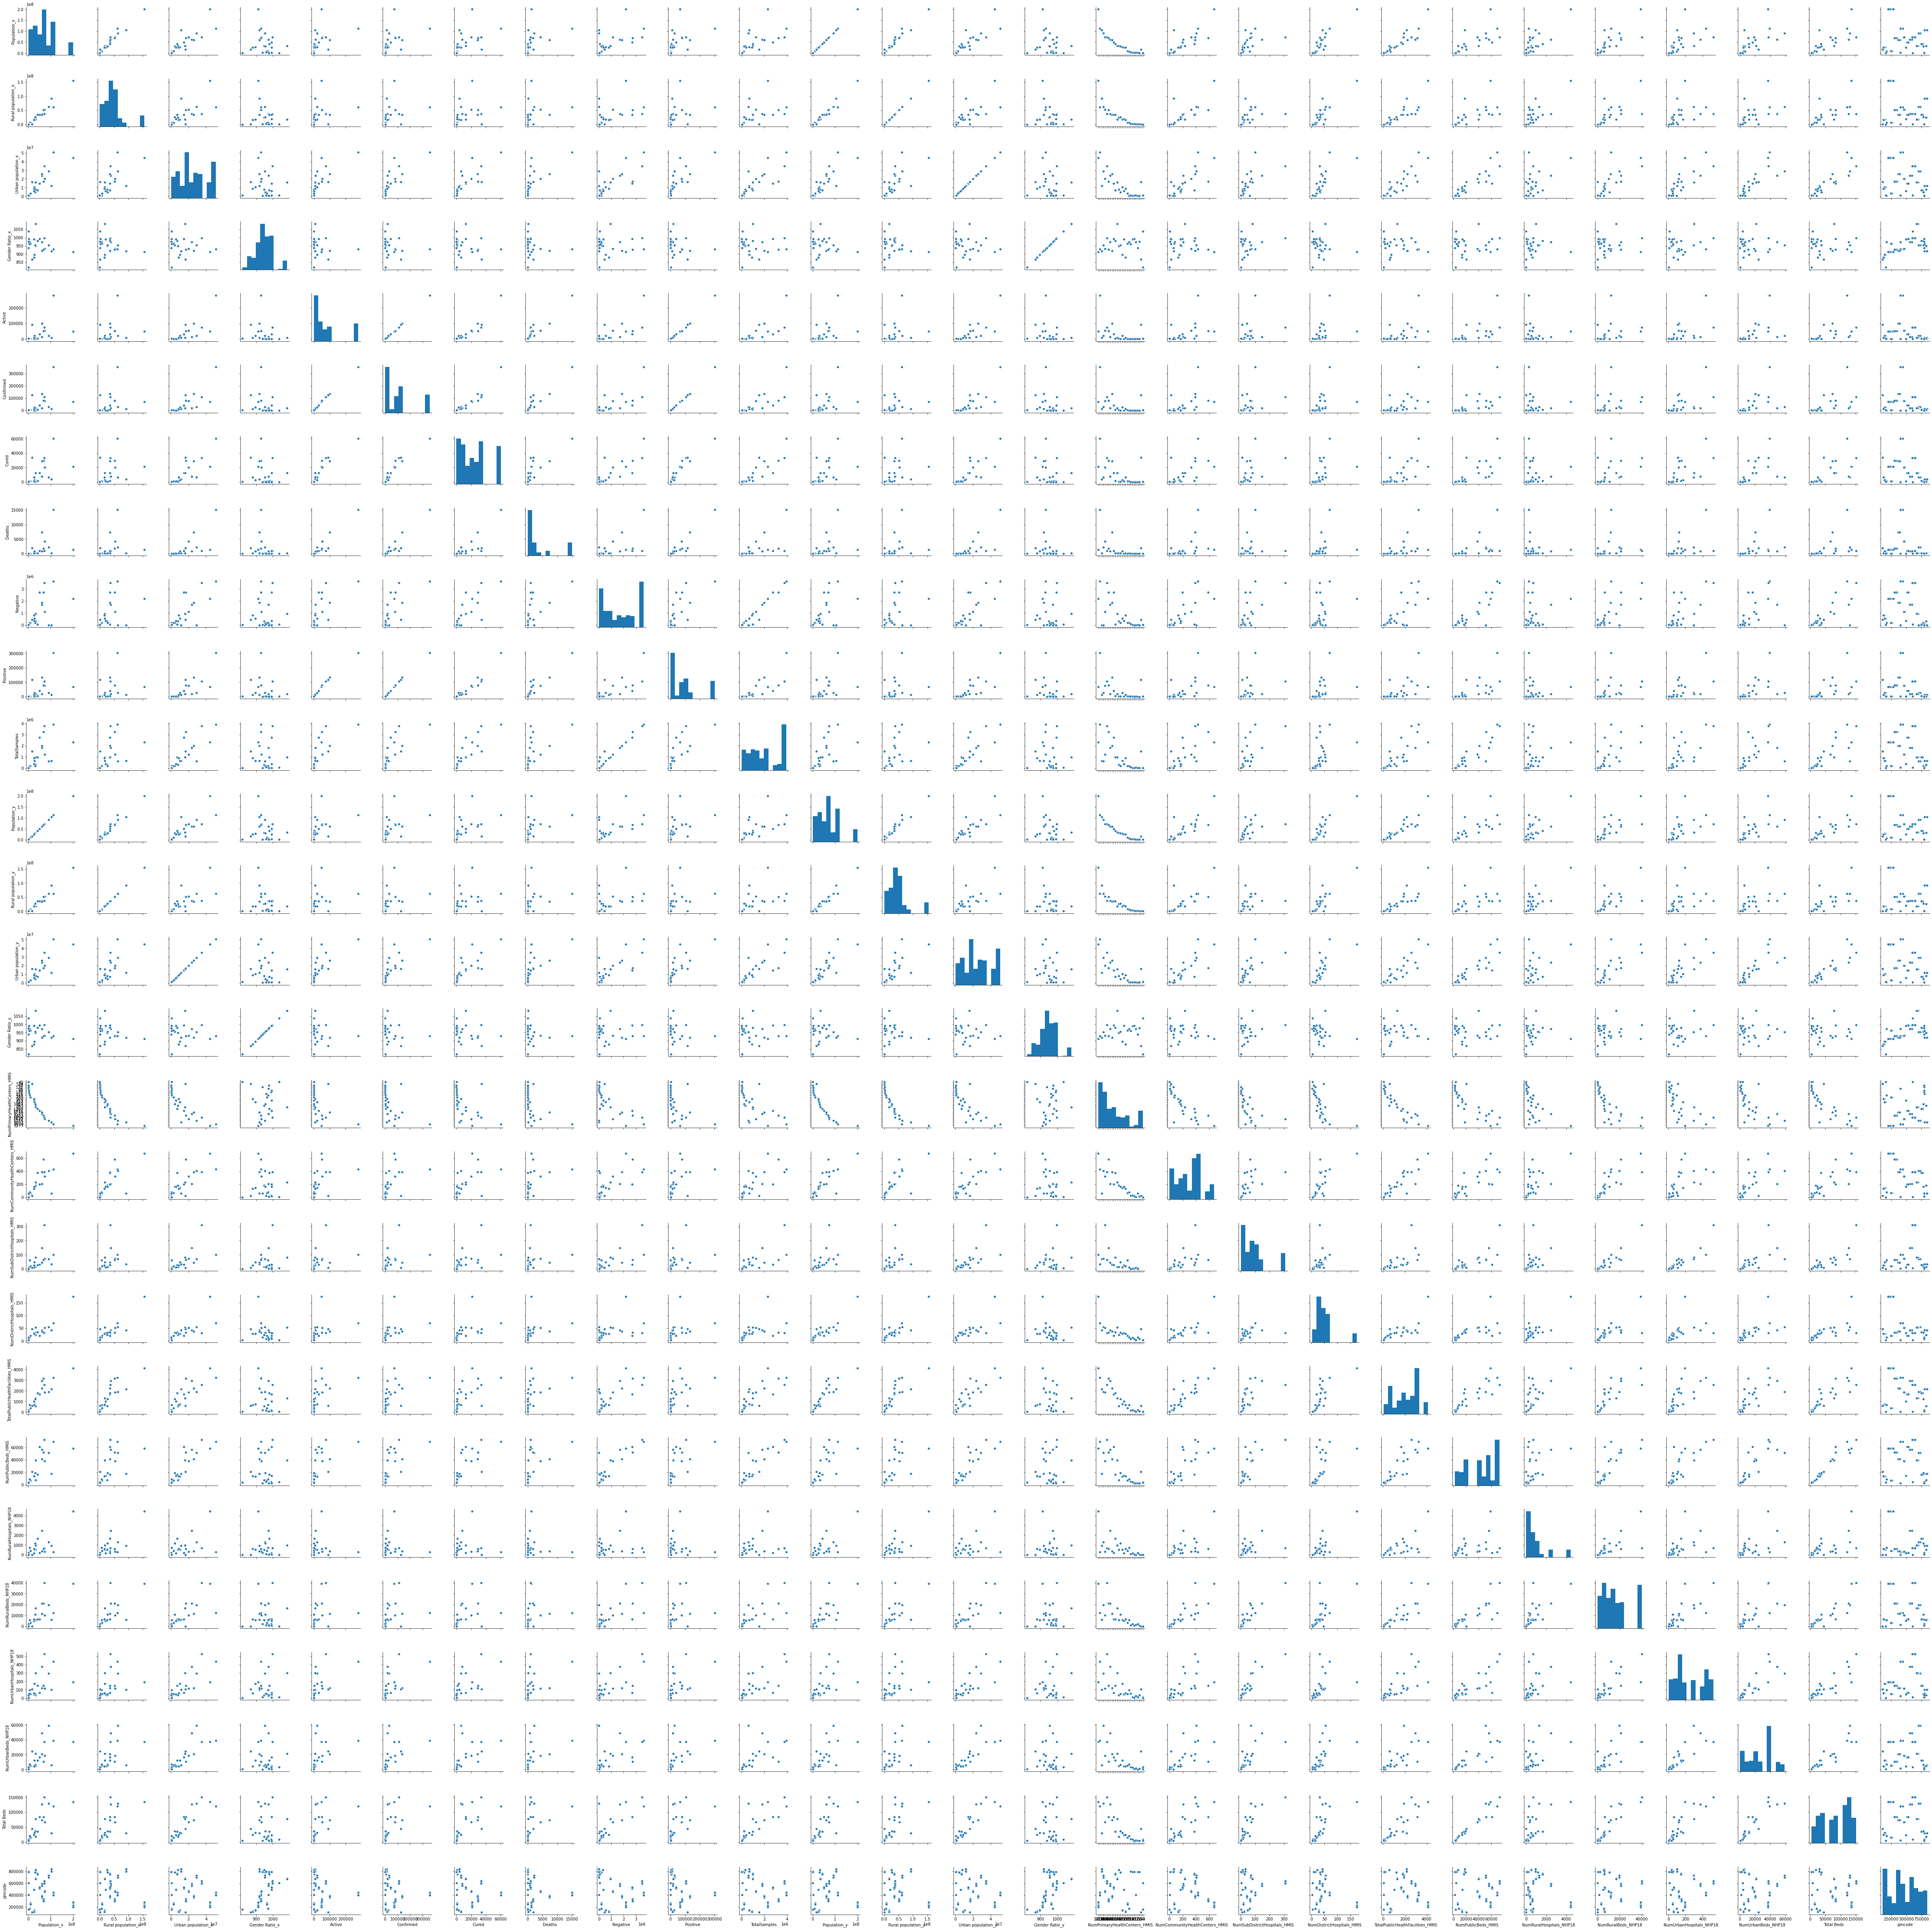

In [0]:
sns.pairplot(df_merge)

In [71]:
# correlation of 'Active' cases with other features
df_merge.corrwith(df_merge['Active'])

Population_x                        0.413043
Rural population_x                  0.202715
Urban population_x                  0.792571
Gender Ratio_x                     -0.228817
Active                              1.000000
Confirmed                           0.998965
Cured                               0.949552
Deaths                              0.963968
Negative                            0.712078
Positive                            0.995608
TotalSamples                        0.754381
Population_y                        0.413043
Rural population_y                  0.202715
Urban population_y                  0.792571
Gender Ratio_y                     -0.228817
NumCommunityHealthCenters_HMIS      0.373376
NumSubDistrictHospitals_HMIS        0.154803
NumDistrictHospitals_HMIS           0.251071
TotalPublicHealthFacilities_HMIS    0.490816
NumPublicBeds_HMIS                  0.569208
NumRuralHospitals_NHP18            -0.299391
NumRuralBeds_NHP18                 -0.027305
NumUrbanHo

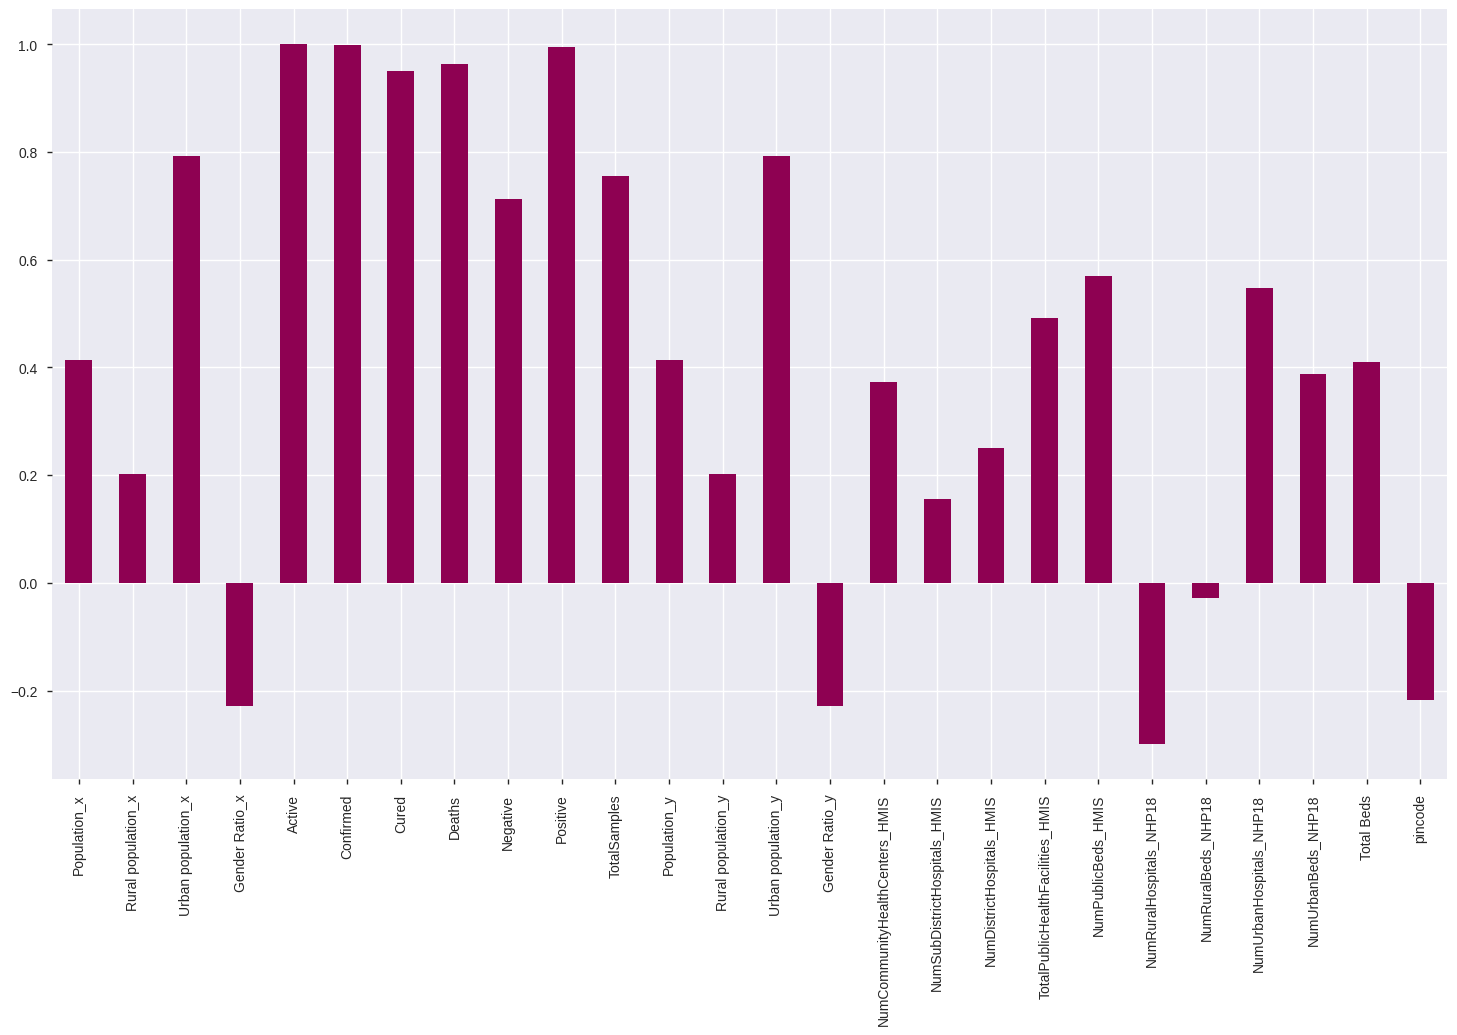

In [72]:
plt.figure(figsize=(18,10))
df_merge.corrwith(df_merge['Active']).plot.bar(cmap='PiYG',grid=True)

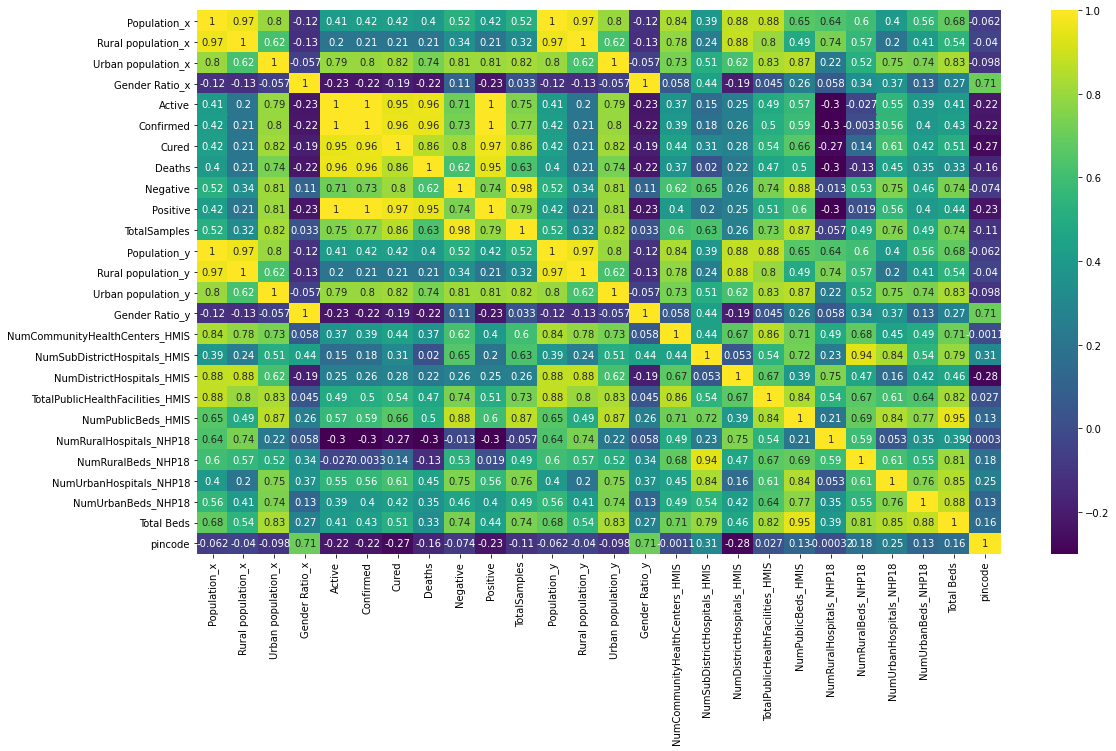

In [0]:
plt.figure(figsize=(18,10))
sns.heatmap(df_merge.corr(),cmap='viridis',annot=True)

**Visualizing Dataset 2:**

**lockdownindiawarningzones.csv**

Zones in India

India is divided into three zones:

Red Zone - Where cases are high

Orange Zone - Where cases are less

Greeen Zone - Where cases are very less or not present only

In [97]:
df_lockdownwar.head()

S.no                  District                        State        Zone
0     1            South Andamans  Andaman And Nicobar Islands    Red Zone
1     2                  Nicobars  Andaman And Nicobar Islands  Green Zone
2     3  North And Middle Andaman  Andaman And Nicobar Islands  Green Zone
3     4                   Kurnool               Andhra Pradesh    Red Zone
4     5                    Guntur               Andhra Pradesh    Red Zone

In [99]:
df_lockdownwar.isnull().sum()

S.no        0
District    0
State       0
Zone        0
dtype: int64

In [0]:
df_lockdownwar.drop('S.no',axis=1,inplace=True)

In [102]:
sum(df_lockdownwar.duplicated())

0

In [103]:
configure_plotly_browser_state()
fig = px.pie(df_lockdownwar,names="Zone",template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [104]:
configure_plotly_browser_state()
fig = px.treemap(df_lockdownwar, path=["State",'Zone','District'],color='Zone', hover_data=['Zone'])
fig.show()

In [105]:
configure_plotly_browser_state()
fig = px.sunburst(df_lockdownwar, path=["State",'Zone'],color='Zone', hover_data=['Zone'])
fig.show()

This marks the end of Explortory Data Analysis and Data Visualization.

Predictions on the dataset 1 will be included in the Part II of this project.